<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Collabs/blob/main/Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularización en Machine Learning (Ridge y Lasso)
En los modelos de Machine Learning, especialmente los más complejos y flexibles, corremos el riesgo de 'sobreajustar' (overfit) a los datos de entrenamiento. Esto significa que el modelo se ajusta tan bien a los datos con los que fue entrenado que aprende el 'ruido' o las particularidades específicas de esos datos, en lugar de la relación subyacente.  


Esto se traduce en:

Bajo Sesgo (Bias): El modelo se ajusta muy bien a los datos de entrenamiento.
Alta varianza (Variance): Las predicciones para nuevos datos (no vistos durante el entrenamiento) son muy malas.
Imaginemos un modelo que traza una curva que pasa por todos los puntos de nuestros datos de entrenamiento perfectamente. Aunque parece ideal, es probable que no generalice bien a nuevos datos.

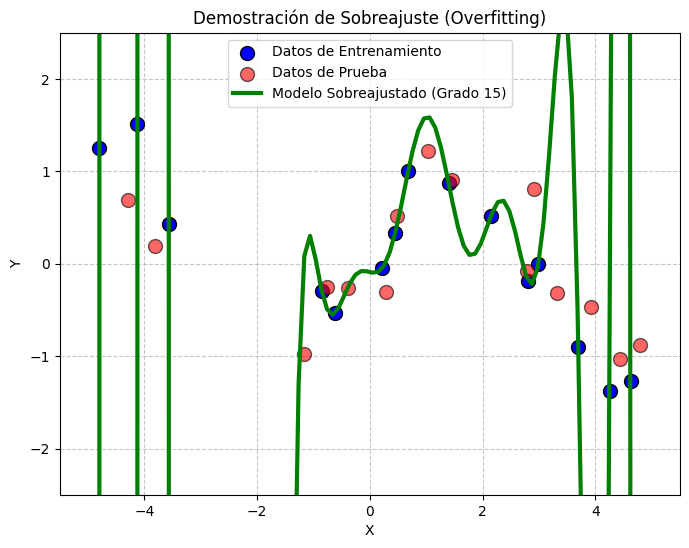

Observa cómo la curva verde del modelo sobreajustado pasa casi perfectamente por cada punto de los 'Datos de Entrenamiento' (azules).
Esto indica un bajo sesgo con respecto a los datos de entrenamiento. Sin embargo, si observamos los 'Datos de Prueba' (rojos), la curva no los predice bien, lo que demuestra una alta varianza. 


In [ ]:
# Sobreajuste
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generar datos sintéticos
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples)) * 10 - 5
y = np.sin(X) + np.random.randn(n_samples) * 0.3

# Dividir en datos de entrenamiento y prueba (simple para demostración)
X_train = X[::2]
y_train = y[::2]
X_test = X[1::2]
y_test = y[1::2]

# Aumentar la dimensión de X para scikit-learn
X_train_reshaped = X_train[:, np.newaxis]
X_test_reshaped = X_test[:, np.newaxis]

# Modelo de regresión polinómica de alto grado (simulando sobreajuste)
# Grado alto para forzar el sobreajuste
degree = 15
model_overfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_overfit.fit(X_train_reshaped, y_train)

# Predicciones para graficar la curva suave
X_plot = np.linspace(-5, 5, 100)[:, np.newaxis]
y_plot_overfit = model_overfit.predict(X_plot)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', s=100, edgecolors='black', label='Datos de Entrenamiento', zorder=2)
plt.scatter(X_test, y_test, color='red', s=100, edgecolors='black', alpha=0.6, label='Datos de Prueba', zorder=2) # Mostrar datos de prueba
plt.plot(X_plot, y_plot_overfit, color='green', linewidth=3, label=f'Modelo Sobreajustado (Grado {degree})')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Demostración de Sobreajuste (Overfitting)")
plt.ylim(-2.5, 2.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Observa cómo la curva verde del modelo sobreajustado pasa casi perfectamente por cada punto de los 'Datos de Entrenamiento' (azules).")
print("Esto indica un bajo sesgo con respecto a los datos de entrenamiento. Sin embargo, si observamos los 'Datos de Prueba' (rojos), la curva no los predice bien, lo que demuestra una alta varianza. ")

En este script, generamos un conjunto de datos simple y lo dividimos en datos de entrenamiento y prueba. Luego, entrenamos un modelo de regresión polinómica con un grado muy alto. Esto hace que el modelo sea muy flexible y capaz de capturar cada pequeña fluctuación en los datos de entrenamiento, incluso el ruido.

El gráfico resultante muestra claramente el sobreajuste: la curva del modelo (verde) se ajusta casi perfectamente a los puntos de datos de entrenamiento (azules), pasando directamente por ellos. Sin embargo, cuando observamos los datos de prueba (rojos), que el modelo no ha visto antes, la curva no los representa bien. Esto es una señal de alta varianza, donde el modelo funciona mal con datos nuevos.

El objetivo es encontrar un equilibrio para que el modelo no solo aprenda de los datos de entrenamiento, sino que también generalice bien a datos que no ha visto. Aquí es donde entra la regularización.

**Solución: Regularización (Ridge y Lasso)**

Básicamente, la regularización reduce la sensibilidad del modelo a los datos de entrenamiento, lo que significa que el modelo no se ajustará tan perfectamente a ellos, y a cambio, hará mejores predicciones para nuevos datos.  

En términos técnicos, la regularización aumenta un poco el sesgo del modelo, pero logra una gran disminución en la varianza.

En este capítulo, nos centraremos en dos tipos principales de regularización: Ridge y Lasso. Ambas se aplican en el contexto de la regresión lineal, pero sus principios se pueden extender a casi cualquier algoritmo de machine learning.

## Regularización Ridge (L2 o Cuadrática)
La Regularización Ridge, también conocida como Regularización L2 o Cuadrática, es una técnica que busca mejorar la capacidad de generalización de un modelo.

Imaginemos que tenemos datos de Peso y Estatura. Dividimos estos datos en un conjunto de entrenamiento y un conjunto de prueba.  Si ajustamos una recta a solo dos puntos en los datos de entrenamiento, la SSR (Suma de Residuos Cuadrados) podría ser 0, lo que significa un ajuste perfecto.  Sin embargo, una pendiente tan pronunciada puede hacer que las predicciones para los datos de prueba sean muy malas.


La Regularización Ridge aborda esto al penalizar las pendientes grandes.

Cuando la regresión lineal tradicional busca la pendiente y el intercepto que minimizan la SSR, la Regularización Ridge busca minimizar una nueva función de costo:

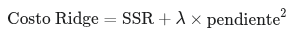

Donde:

SSR es la Suma de Residuos Cuadrados.
λ (lambda) es un número positivo que determina la fuerza de la penalización.
pendiente²= es el cuadrado de la pendiente.

Al añadir λ×pendiente² a la función de costo, estamos "castigando" a las pendientes grandes. Esto fuerza al modelo a elegir pendientes más pequeñas, incluso si eso significa un ligero aumento en la SSR.  El resultado es una recta que no se ajusta perfectamente a los datos de entrenamiento, pero que generaliza mejor a los datos de prueba.


Efecto de Lambda (λ):
Si $ \lambda = 0 $, la penalización es 0, y el modelo es equivalente a una regresión lineal estándar (solo minimiza la SSR).  

A medida que λ aumenta, la penalización se vuelve más fuerte, forzando las pendientes a acercarse a cero.   Si λ es muy grande, la pendiente puede llegar a ser casi cero, y el modelo predice simplemente la media de la variable dependiente.

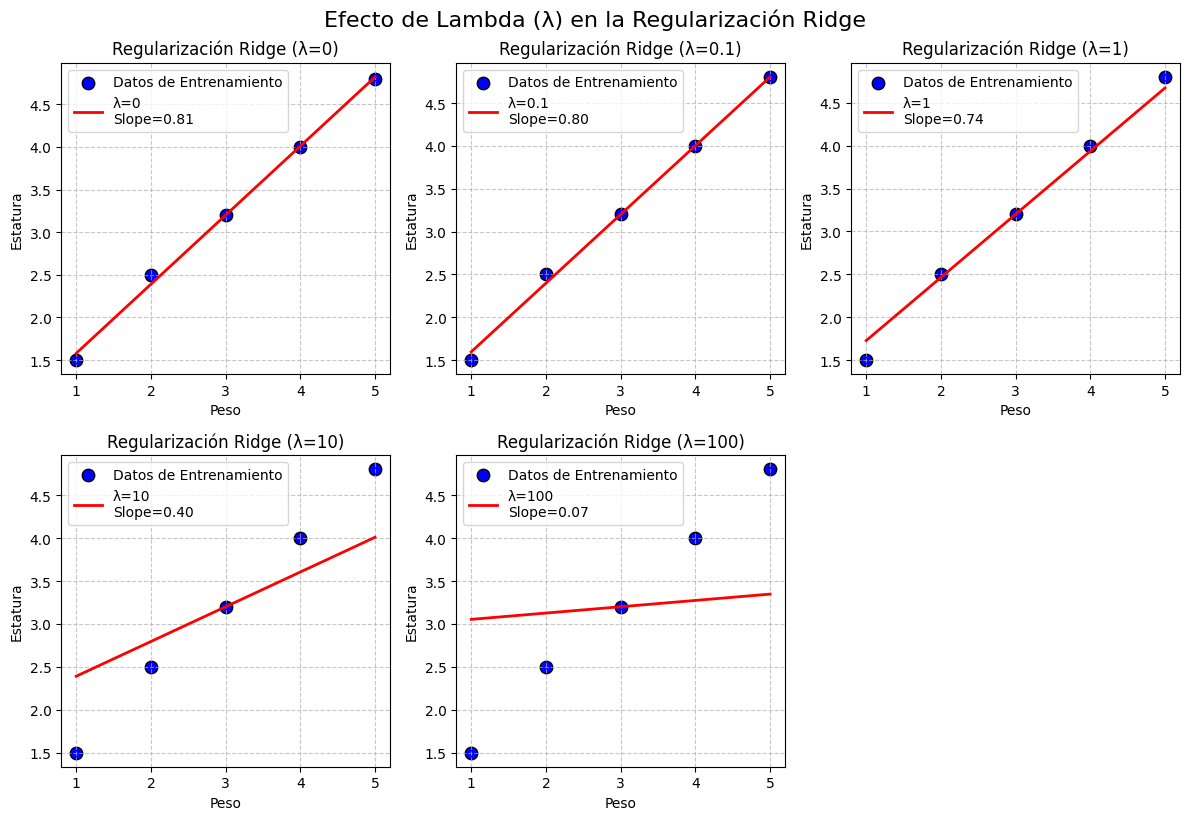

Al observar cómo la pendiente (Slope) cambia a medida que incrementamos lambda (λ), podemos ver que a medida que λ aumenta, la pendiente se reduce, acercándose a cero. 
Esto demuestra cómo la penalización de Ridge restringe los coeficientes del modelo para evitar el sobreajuste. 


In [ ]:
# Demostración de Regularización Ridge y el efecto de Lambda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Datos de ejemplo (simulados para simplicidad)
np.random.seed(42)
X_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_train = np.array([1.5, 2.5, 3.2, 4.0, 4.8])

# Datos de prueba (para ver la generalización, aunque aquí solo se muestra el ajuste)
X_test = np.array([1.5, 2.8, 4.2, 5.5]).reshape(-1, 1)
y_test = np.array([2.0, 3.0, 4.1, 5.0])

# Valores de lambda (alpha en scikit-learn) a probar
lambdas = [0, 0.1, 1, 10, 100]

plt.figure(figsize=(12, 8))

for i, lmbd in enumerate(lambdas):
    # Entrenar el modelo Ridge
    ridge_model = Ridge(alpha=lmbd)
    ridge_model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = ridge_model.predict(X_train)
    y_pred_plot = ridge_model.predict(np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1))

    # Calcular SSR en los datos de entrenamiento (para fines ilustrativos, no es el costo de Ridge directamente)
    ssr = np.sum((y_train - y_pred_train)**2)

    # Obtener pendiente e intercepto
    slope = ridge_model.coef_[0]
    intercept = ridge_model.intercept_

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', s=80, edgecolors='black', label='Datos de Entrenamiento')
    plt.plot(np.linspace(X_train.min(), X_train.max(), 100), y_pred_plot,
             color='red', linewidth=2, label=f'λ={lmbd}\nSlope={slope:.2f}')
    plt.title(f'Regularización Ridge (λ={lmbd})')
    plt.xlabel("Peso")
    plt.ylabel("Estatura")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Efecto de Lambda (λ) en la Regularización Ridge', fontsize=16, y=1.02)
plt.show()

print("Al observar cómo la pendiente (Slope) cambia a medida que incrementamos lambda (λ), podemos ver que a medida que λ aumenta, la pendiente se reduce, acercándose a cero. ")
print("Esto demuestra cómo la penalización de Ridge restringe los coeficientes del modelo para evitar el sobreajuste. ")

Este script nos permite visualizar el impacto de λ en la Regularización Ridge. Creamos un conjunto de datos simple y luego entrenamos modelos Ridge con diferentes valores de λ (llamado alpha en scikit-learn).

Observen cómo:

Cuando $ \lambda = 0 $, la línea ajustada es la misma que la de una regresión lineal estándar.
A medida que λ aumenta, la pendiente de la línea se vuelve menos pronunciada, acercándose a cero.  Esto ocurre porque la penalización λ×pendiente
2
  se vuelve más fuerte, obligando al modelo a reducir la magnitud de los coeficientes.

Este proceso ayuda a que el modelo sea menos sensible a las variaciones en los datos de entrenamiento, lo que a su vez reduce la varianza y mejora la generalización a nuevos datos.

### Regularización Lasso (L1 o Valor Absoluto)
La Regularización Lasso, también conocida como Regularización L1 o de Valor Absoluto, es otra técnica de regularización que comparte el objetivo de la Regularización Ridge, pero con una diferencia clave en cómo penaliza los coeficientes.

Mientras que Ridge penaliza el cuadrado de la pendiente, Lasso penaliza el valor absoluto de la pendiente.  La función de costo para Lasso es:

Costo Lasso=SSR+λ×∣pendiente∣


Donde:

SSR es la Suma de Residuos Cuadrados.
λ es el parámetro de regularización.
∣pendiente∣ es el valor absoluto de la pendiente.
La gran diferencia entre Ridge y Lasso radica en que Lasso tiene la capacidad de reducir los parámetros hasta cero, mientras que Ridge solo los reduce asintóticamente cerca de cero, pero nunca exactamente a cero.

Esto significa que Lasso puede realizar la selección de características, eliminando de forma efectiva las variables menos importantes del modelo al establecer sus coeficientes en cero.  


Lasso es útil cuando: Se necesita eliminar muchas variables innecesarias del modelo, resultando en un modelo más simple y más interpretable.
Ridge es útil cuando: La mayoría de las variables son útiles para la predicción.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Generar datos sintéticos
np.random.seed(42)
n_samples = 50
X_util = np.random.rand(n_samples) * 10 # Variable útil (Peso)
X_inutil = np.random.rand(n_samples) * 10 # Variable inútil (Velocidad de una Golondrina)

# La variable 'y' depende fuertemente de X_util y muy poco de X_inutil
y = 2 * X_util + 0.1 * X_inutil + np.random.randn(n_samples) * 2

# Combinar variables predictoras
X_combined = np.column_stack((X_util, X_inutil))

# Entrenar un modelo de Regresión Lineal estándar
linear_model = LinearRegression()
linear_model.fit(X_combined, y)

# Entrenar un modelo Ridge
ridge_model = Ridge(alpha=100) # Lambda (alpha) alto para ver el efecto
ridge_model.fit(X_combined, y)

# Entrenar un modelo Lasso
lasso_model = Lasso(alpha=10) # Lambda (alpha) alto para ver el efecto
lasso_model.fit(X_combined, y)

print("Coeficientes de los modelos:")
print(f"Regresión Lineal Estándar: Coef. X_util = {linear_model.coef_[0]:.3f}, Coef. X_inutil = {linear_model.coef_[1]:.3f}")
print(f"Regularización Ridge (λ=100): Coef. X_util = {ridge_model.coef_[0]:.3f}, Coef. X_inutil = {ridge_model.coef_[1]:.3f}")
print(f"Regularización Lasso (λ=10): Coef. X_util = {lasso_model.coef_[0]:.3f}, Coef. X_inutil = {lasso_model.coef_[1]:.3f}")

# Visualización de los coeficientes (más informativo que un gráfico de dispersión en este caso)
labels = ['Coef. X_util', 'Coef. X_inutil']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar(x - width, linear_model.coef_, width, label='Lineal Estándar', color='skyblue')
ax.bar(x, ridge_model.coef_, width, label='Ridge (λ=100)', color='lightcoral')
ax.bar(x + width, lasso_model.coef_, width, label='Lasso (λ=10)', color='lightgreen')

ax.set_ylabel('Valor del Coeficiente')
ax.set_title('Comparación de Coeficientes: Lineal Estándar vs. Ridge vs. Lasso')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axhline(0, color='gray', linewidth=0.8)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nLa diferencia clave entre Ridge y Lasso es la siguiente: ")
print("Ridge solo puede reducir los parámetros para que sean asintóticamente cercanos a 0, pero nunca los establece exactamente en 0.  Observa el coeficiente de 'X_inutil' en el modelo Ridge, es muy pequeño pero no cero.")
print("Lasso, por el contrario, puede reducir los parámetros hasta 0, eliminando efectivamente variables inútiles del modelo.   Observa cómo el coeficiente de 'X_inutil' en el modelo Lasso se ha vuelto cero.")
print("Esto convierte a Lasso en una herramienta poderosa para la selección de características y la simplificación del modelo. ")

En este script, simulamos un escenario con dos variables predictoras: una 'útil' (que tiene un fuerte impacto en la variable objetivo) y una 'inútil' (que tiene un impacto muy pequeño).

Comparamos tres modelos:

Regresión Lineal Estándar: Sin regularización.
Regularización Ridge: Con un λ (alpha) alto.
Regularización Lasso: Con un λ (alpha) alto.
Observen los coeficientes para la X_inutil:

El modelo lineal estándar le asigna un coeficiente pequeño, pero no cero.
El modelo Ridge reduce el coeficiente de X_inutil significativamente, acercándolo a cero, pero sin alcanzarlo del todo.
El modelo Lasso, en cambio, establece el coeficiente de X_inutil en cero.
Esta es la característica distintiva de Lasso: su capacidad para nulificar coeficientes de variables inútiles, lo que resulta en un modelo más simple y con menos características.  Ridge es más adecuado cuando la mayoría de las variables son útiles, mientras que Lasso destaca cuando hay muchas variables innecesarias.

## Combinación de Ridge y Lasso: Elastic Net
Es importante mencionar que las regularizaciones Ridge y Lasso a menudo se combinan en una técnica llamada Elastic Net.  Esta combinación busca obtener lo mejor de ambos mundos: la capacidad de Ridge para manejar la multicolinealidad y la capacidad de Lasso para la selección de características.

Elastic Net añade una penalización que es una combinación lineal de las penalizaciones L1 (Lasso) y L2 (Ridge). Esto permite que el modelo aproveche las ventajas de ambas técnicas.

Coeficientes del modelo Elastic Net:
Característica 1: 1.568
Característica 2: 0.218
Característica 3: 0.311
Característica 4: 0.052
Característica 5: -0.000
Intercepto: 1.407

Elastic Net combina las penalizaciones L1 (Lasso) y L2 (Ridge).
El parámetro 'l1_ratio' controla el balance:
  - l1_ratio = 0: Equivalente a Regularización Ridge.
  - l1_ratio = 1: Equivalente a Regularización Lasso.
  - 0 < l1_ratio < 1: Una mezcla de ambas.

Observa cómo Elastic Net puede reducir algunos coeficientes cerca de cero (como Ridge) o exactamente a cero (como Lasso), dependiendo del 'l1_ratio' y 'alpha' elegidos.


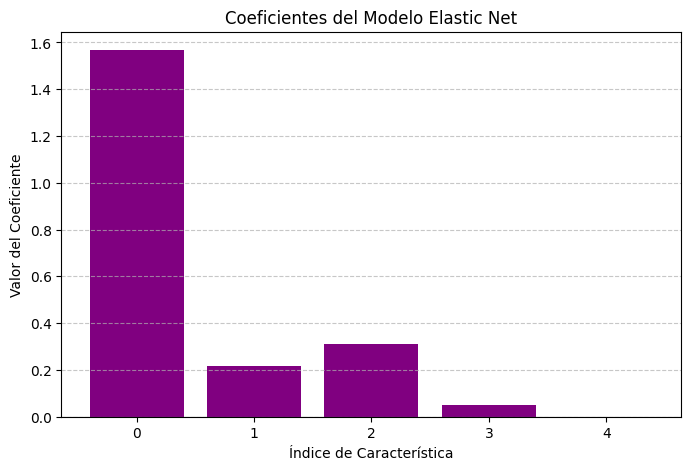

In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Datos de ejemplo (simulados)
np.random.seed(0)
X = np.random.rand(50, 5) # 50 muestras, 5 características
y = 3 * X[:, 0] + 1.5 * X[:, 1] + 0.5 * X[:, 2] + np.random.randn(50) * 0.5

# Entrenar un modelo Elastic Net
# alpha: controla la fuerza total de la regularización (lambda)
# l1_ratio: controla la mezcla entre L1 y L2 (0 = Ridge, 1 = Lasso)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X, y)

print("Coeficientes del modelo Elastic Net:")
for i, coef in enumerate(elastic_net_model.coef_):
    print(f"Característica {i+1}: {coef:.3f}")
print(f"Intercepto: {elastic_net_model.intercept_:.3f}")

print("\nElastic Net combina las penalizaciones L1 (Lasso) y L2 (Ridge).")
print("El parámetro 'l1_ratio' controla el balance:")
print("  - l1_ratio = 0: Equivalente a Regularización Ridge.")
print("  - l1_ratio = 1: Equivalente a Regularización Lasso.")
print("  - 0 < l1_ratio < 1: Una mezcla de ambas.")
print("\nObserva cómo Elastic Net puede reducir algunos coeficientes cerca de cero (como Ridge) o exactamente a cero (como Lasso), dependiendo del 'l1_ratio' y 'alpha' elegidos.")

# No es un gráfico del documento, pero ilustra cómo los coeficientes pueden ser afectados
plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), elastic_net_model.coef_, color='purple')
plt.xlabel("Índice de Característica")
plt.ylabel("Valor del Coeficiente")
plt.title("Coeficientes del Modelo Elastic Net")
plt.axhline(0, color='gray', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Elastic Net es una técnica de regularización que combina lo mejor de Ridge y Lasso.  En lugar de elegir entre una u otra, Elastic Net utiliza una combinación de ambas penalizaciones:

La penalización L1 de Lasso (valor absoluto)
La penalización L2 de Ridge (cuadrado)
Esto se controla mediante dos hiperparámetros:

alpha (similar a λ): La fuerza total de la regularización.
l1_ratio: Determina la proporción de penalización L1 vs. L2. Si l1_ratio es 0, es Ridge; si es 1, es Lasso; si está entre 0 y 1, es una mezcla.
Elastic Net es particularmente útil en situaciones donde hay muchas características correlacionadas o cuando se desea tanto la selección de características como la reducción de la multicolinealidad.